In [2]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [3]:
df = pd.read_csv('../../../data/handlebar/processed_segments_overlap_50.csv') 
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9312,1.0,-1.575378,5.295975,5.295975,16.682800,19.517532,14.781799,14.609421,7.469910,11.252747,...,-6.689407,2.274490,4.649536,-18.933350,-24.708160,-21.212631,-3.002335,10.764328,19.019547,19.871872
9313,1.0,0.100555,-6.871353,3.026276,17.348389,15.734695,13.632584,13.632584,14.556747,12.014099,...,-22.385788,-30.980972,-23.218964,-6.301544,14.973343,18.669983,26.542114,38.690308,48.295837,53.400284
9314,1.0,6.004654,9.461884,15.811310,22.572540,20.719421,20.719421,7.910446,0.928955,-0.574615,...,4.922485,19.182343,20.283676,20.283676,12.129028,-3.567368,-3.567368,1.077393,9.370911,10.749970
9315,1.0,60.429657,25.072083,9.495407,-14.068329,-19.512741,-11.065994,2.049438,2.049438,10.376465,...,0.210693,0.804459,0.804459,11.267120,10.807434,8.063675,4.228165,4.505890,19.072205,19.072205


In [6]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [7]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])



In [8]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,0.099842,0.367573,-0.760735,-0.741110,-0.643996,1.478013,1.460586,0.377973,-1.298170,-2.613329,...,-0.582613,-1.255213,-0.701392,0.471675,0.901263,0.321502,-0.614684,0.125772,0.418495,0.0
1,0.287473,-0.438213,-0.262225,-0.632199,0.733360,0.425447,0.325230,0.411709,-0.423649,0.776224,...,-0.527615,0.937265,1.770801,1.560933,-0.131658,-1.879847,-1.206281,-0.206123,0.528233,0.0
2,-0.889006,-0.240796,0.149586,0.175351,-0.117633,-0.764769,-1.020560,-0.874950,-0.199176,0.381914,...,-0.216459,-0.520273,-0.635812,-0.342957,0.028676,1.100680,0.824921,-0.265390,-0.858003,0.0
3,1.466225,1.286168,-0.577708,-1.422806,-0.696546,0.911753,0.885006,-0.045683,-1.041988,-0.455054,...,-3.053017,1.231087,2.014817,-2.399102,-6.967440,-6.682476,-0.651555,0.426846,-4.315520,0.0
4,-0.690028,-0.464805,1.045457,0.830425,0.002728,-1.053255,-0.338514,0.800059,0.798846,0.158502,...,-0.794318,-1.508160,-1.290846,0.791125,2.443709,1.781598,-0.239281,-0.758489,-0.189899,0.0


In [11]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
# Example usage: Accessing the original index
# print(normal_test_data_scaled.index)
# print(abnormal_test_data_scaled.index)

In [12]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [37]:
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
class AutoEncoder(Model):
    def __init__(self, name='auto_encoder', **kwargs):
        super(AutoEncoder, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(104, activation='tanh'),
            tf.keras.layers.Dense(152, activation='tanh'),
            tf.keras.layers.Dense(112, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='tanh'),
            tf.keras.layers.Dense(184, activation='tanh'),
            tf.keras.layers.Dense(224, activation='tanh'),
            tf.keras.layers.Dense(100, activation='tanh'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def get_config(self):
        config = super().get_config()
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [38]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.compile(optimizer='adam', loss='mae')

In [39]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=150, 
                    batch_size=192,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4120 - val_loss: 0.3196
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3180 - val_loss: 0.2830
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2854 - val_loss: 0.2625
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2603 - val_loss: 0.2476
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2486 - val_loss: 0.2375
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2401 - val_loss: 0.2283
Epoch 7/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2281 - val_loss: 0.2221
Epoch 8/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2221 - val_loss: 0.2166
Epoch 9/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2168 - val_loss: 0.2113
Epoch 10/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2121 - val_loss: 0.2069
Epoch 11/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2032 - val_loss: 0.2026
Epoch 12/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

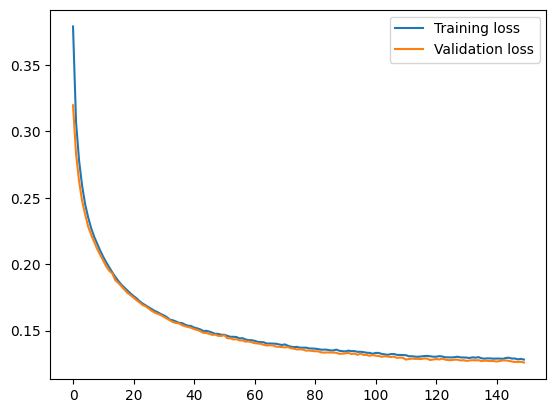

In [40]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [41]:
from keras import ops
model.save('autoencoder_best.keras')

In [42]:
load_model = tf.keras.models.load_model('autoencoder_best.keras')

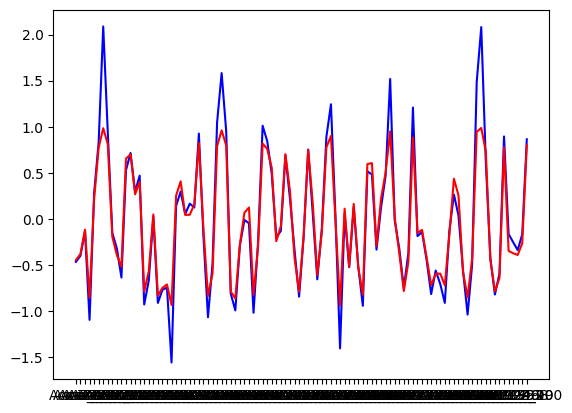

In [44]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = load_model.encoder(normal_test_data_scaled).numpy()
decoder_out = load_model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled.iloc[0], 'blue')
plt.plot(decoder_out[0], 'red')

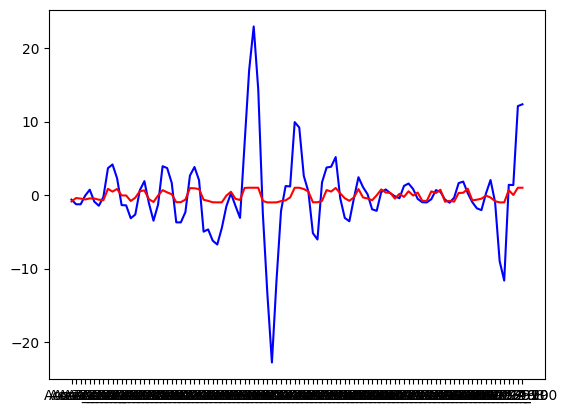

In [45]:
# abnormal data
encoder_out_abnormal = load_model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = load_model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled.iloc[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([500.,  38.,  27., 110., 156., 130., 124., 109.,  86.,  86.,  68.,
         55.,  53.,  42.,  22.,  33.,  24.,  27.,  13.,  13.,  14.,   9.,
          6.,  11.,   1.,   3.,   2.,   8.,   4.,   0.,   3.,   2.,   2.,
          5.,   1.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.]),
 array([0.00376833, 0.02240448, 0.04104064, 0.05967679, 0.07831295,
        0.0969491 , 0.11558526, 0.13422142, 0.15285757, 0.17149372,
        0.19012988, 0.20876604, 0.2274022 , 0.24603835, 0.26467451,
        0.28331065, 0.30194682, 0.32058299, 0.33921912, 0.35785529,
        0.37649143, 0.39512759, 0.41376376, 0.4323999 , 0.45103607,
        0.46967223, 0.48830837, 0.50694454, 0.5255807 , 0.54421687,
        0.56285298, 0.58148915, 0.60012531, 0.61876148, 0.63739765,
        0.65603375, 0.67466992, 0.69330609, 0.71194226, 0.73057842,
        0.74921453, 0.7678507 , 0.78648686, 0.80512303, 0.8237592 ,
        0.84239537, 0.86103147, 0.87966764, 0.

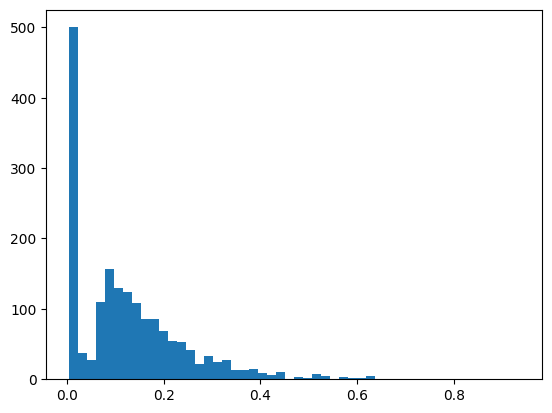

In [46]:
# Reconstruct normal test data and calculate loss
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(array([1., 0., 1., 0., 1., 0., 0., 1., 0., 3., 0., 1., 1., 3., 3., 1., 1.,
        1., 3., 6., 0., 2., 4., 1., 0., 0., 4., 3., 2., 4., 3., 1., 3., 2.,
        1., 0., 3., 1., 0., 0., 2., 0., 1., 1., 0., 1., 0., 1., 0., 1.]),
 array([0.35288343, 0.41644537, 0.48000732, 0.54356927, 0.60713124,
        0.67069316, 0.73425508, 0.79781705, 0.86137903, 0.92494094,
        0.98850286, 1.0520649 , 1.11562681, 1.17918873, 1.24275064,
        1.30631268, 1.3698746 , 1.43343651, 1.49699843, 1.56056046,
        1.62412238, 1.6876843 , 1.75124633, 1.81480825, 1.87837017,
        1.94193208, 2.00549388, 2.06905603, 2.13261795, 2.19617987,
        2.25974178, 2.3233037 , 2.38686562, 2.45042753, 2.51398945,
        2.57755136, 2.64111328, 2.70467544, 2.76823735, 2.83179927,
        2.89536119, 2.9589231 , 3.02248502, 3.08604693, 3.14960909,
        3.21317101, 3.27673292, 3.34029484, 3.40385675, 3.46741867,
        3.53098059]),
 <BarContainer object of 50 artists>)

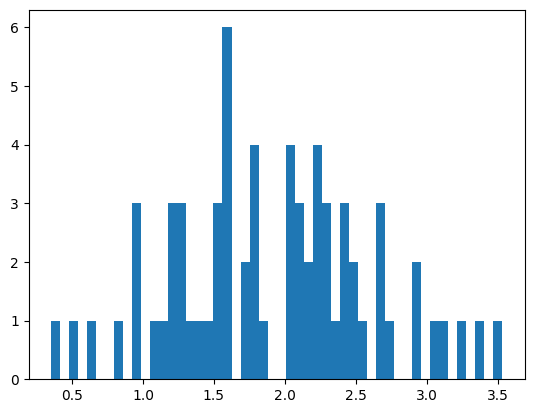

In [18]:
# Reconstruct abnormal test data and calculate loss
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

In [19]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss) + 2.5*np.std(train_loss)
threshold

np.float32(0.44250488)

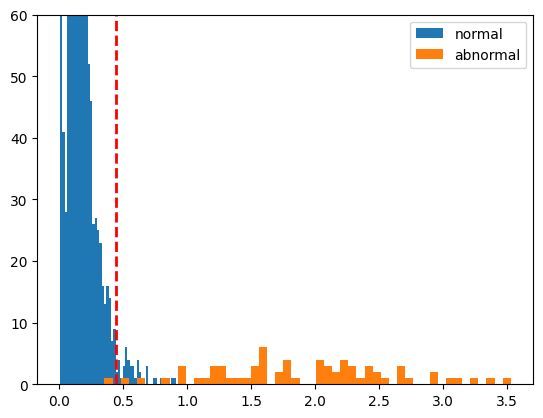

In [ ]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [21]:
preds_normal=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

Correct Predictions:  1753
Accuracy:  0.9760579064587973
False Predictions index:  [73, 143, 241, 335, 379, 432, 460, 551, 620, 660, 669, 725, 766, 771, 781, 790, 805, 848, 960, 967, 984, 1043, 1057, 1086, 1122, 1214, 1273, 1349, 1397, 1408, 1423, 1431, 1441, 1447, 1482, 1498, 1540, 1619, 1670, 1688, 1693, 1705, 1759]


In [22]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  67
Accuracy:  0.9852941176470589


 1/59 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


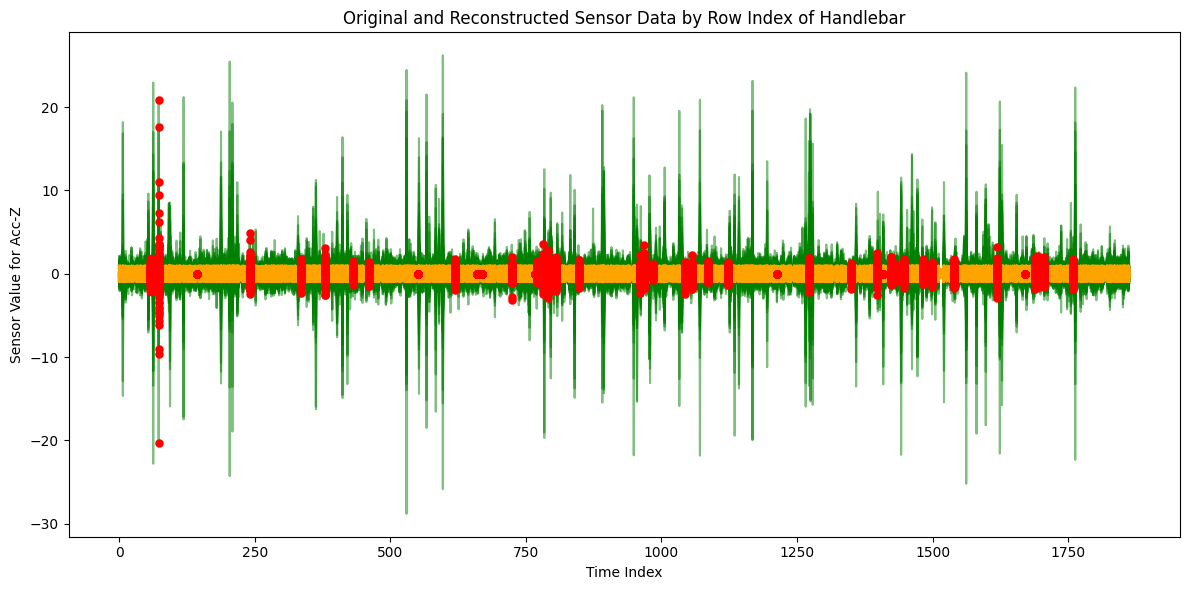

In [23]:
# reconstruct test data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in test_data_scaled_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = test_data_scaled_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, sensor_data[:, i], color='green', alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, reconstructed_data[:, i], color='orange', alpha=0.5)

# Highlight false predictions with a vertical scatter
for row_i in false_predictions_normal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3, linewidths=0.1)
for row_i in false_predictions_abnormal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()